In [23]:
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import json
# from matplotlib.figure import Figure
%matplotlib notebook
# %matplotlib ipympl

In [24]:
file1_name = 'Binyamina/10.01/block8rtk2.csv'
file2_name = '26-Dec/Dec26_nortk_4to2_dev2.csv'
Dec_19 = pd.read_csv(file1_name)
Dec_16_startrow5 = pd.read_csv(file2_name)

In [25]:
x_arr = []
y_arr = []
x_arr_latlong= []
y_arr_latlong= []

x_arr_2 = []
y_arr_2 = []
x_arr_latlong_2 = []
y_arr_latlong_2 = []

reference_point =[]

task_waypoints_array = []
task_waypoints_x_array = []
task_waypoints_y_array = []
task_waypoints_lat_array = []
task_waypoints_lon_array = []

high_res_path = []
high_res_path_x = []
high_res_path_y = []

In [48]:
def populate_arrays(file, file_num):
    if(file_num == 1):
        for ind, entry in enumerate(file.values):
            if(entry[1] != 0 and entry[2] != 0):
                x_arr_latlong.append(entry[1])
                y_arr_latlong.append(entry[2])
                
    elif(file_num == 2):
        for ind, entry in enumerate(file.values):
            if(entry[1] != 0 and entry[2] != 0):
                x_arr_latlong_2.append(entry[1])
                y_arr_latlong_2.append(entry[2])
            
def init_ref_point():
    reference_point.append(task_waypoints_lat_array[0])
    reference_point.append(task_waypoints_lon_array[0])
    
def generate_xy(file_num):
    if(file_num == 1):
        for i in range(len(x_arr_latlong)):
            x,y = ll2xy(reference_point[0], reference_point[1], x_arr_latlong[i], y_arr_latlong[i])
            x_arr.append(x)
            y_arr.append(y)
    elif(file_num == 2):
        for i in range(len(x_arr_latlong_2)):
            x,y = ll2xy(reference_point[0], reference_point[1], x_arr_latlong_2[i], y_arr_latlong_2[i])
            x_arr_2.append(x)
            y_arr_2.append(y)
        
    for i in range(len(task_waypoints_array)):
        x,y = ll2xy(reference_point[0], reference_point[1], task_waypoints_array[i][0], task_waypoints_array[i][1])
        task_waypoints_x_array.append(x)
        task_waypoints_y_array.append(y)
        
def parse_json_task(task_name):
        with open('/app/tasks/' + task_name + '.json') as f:
            file = json.load(f)
        payload = file["payload"]
        data = payload["data"]
        vehicle_task_plan = data["vehicleTaskPlan"]
        route = vehicle_task_plan["route"]
        waypoints = route["waypoints"]
        previous_side = ""
        for i, wp in enumerate(waypoints):
            geometries = wp["geometries"]
            for j, geometry in enumerate(geometries):
                coordinates = geometry["coordinates"]
                for k, coordinate in enumerate(coordinates):
                    x = coordinate["lat"]
                    y = coordinate["lng"]
                    task_waypoints_lat_array.append(x)
                    task_waypoints_lon_array.append(y)
                    point = [x,y]
                    task_waypoints_array.append(point) 
                    
def get_high_res_path(points_per_meter = 4):
        for i in range(len(task_waypoints_x_array)-1):
            p1 = [task_waypoints_x_array[i], task_waypoints_y_array[i]]
            p2 = [task_waypoints_x_array[i+1], task_waypoints_y_array[i+1]]

            x1, y1 = p1[0], p1[1]
            x2, y2 = p2[0], p2[1]
            L = np.hypot(np.abs(x2-x1), np.abs(y2-y1))
            intermediate_pts = int((points_per_meter*L)-2)
            pts_np = np.linspace([p1[0], p1[1]],[p2[0], p2[1]], num=intermediate_pts+2,endpoint=False)
            for idx, pt in enumerate(pts_np):
#                 if idx == pts_np.shape[0] - 1:
#                     print(f'last point, not adding {idx}')
#                 else:
                high_res_path_x.append(pt[0])
                high_res_path_y.append(pt[1])
    
    
def plothighresandlowres(plot_second=False):
    plot_list = []
#     plt.plot(x_arr, y_arr,'.-')
#     plot_list.append(file1_name)
    
#     if plot_second:
#         plt.plot(x_arr_2, y_arr_2,'.-')
#         plot_list.append(file2_name)
    
    plt.plot(high_res_path_x, high_res_path_y, '-g')#,markersize=15)
    plt.plot(task_waypoints_x_array, task_waypoints_y_array, 'o')#,markersize=15)
    
    plot_list.append('high res path')
    plot_list.append('low res point')
    
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    
    legend_tuple = (name for name in plot_list)
#     plt.legend(legend_tuple)
#     plt.legend((file1_name,file2_name,'high res Points', 'low res point'))
#     plt.legend((file1_name,'high res Points', 'low res point'))
#     plt.legend((file1_name, 'lowres res path'))
#     plt.legend((file1_name))
    plt.legend(('high_res', 'low_res'))
    
def plothighrespath():
    plt.plot(x_arr, y_arr,'.-')
    plt.plot(x_arr_2, y_arr_2,'.-')
    plt.plot(high_res_path_x, high_res_path_y, 'or')#,markersize=15)
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.legend((file1_name,file2_name,'high res Points'))
    
def plotlowrespath():
#     plt.plot(x_arr, y_arr,'.-')
    plt.plot(x_arr_2, y_arr_2,'.-')
    plt.plot(task_waypoints_x_array, task_waypoints_y_array, 'xg')#,markersize=15)
    plt.xlabel('x(m)')
    plt.ylabel('y(m)')
    plt.legend((file2_name,'Low res Task Route Points'))
#     plt.legend((file1_name,file2_name,'Low res Task Route Points'))
    
def ll2xy(ref_lat, ref_lon, lat, lon):
        const_Re = 6371000 
        x = (float(lat) - float(ref_lat)) * (math.pi / 180) * const_Re
        y = (float(lon) - float(ref_lon)) * (math.pi / 180) * const_Re * math.cos(float(lat) * math.pi / 180)
        
        return x,y
    
def clear_arrays():
    x_arr.clear()
    y_arr.clear()
    x_arr_2.clear()
    y_arr_2.clear()
    task_waypoints_array.clear()
    task_waypoints_x_array.clear()
    task_waypoints_y_array.clear()
    task_waypoints_lat_array.clear()
    task_waypoints_lon_array.clear()
    high_res_path_y.clear()
    high_res_path_x.clear()
    high_res_path.clear()
    x_arr_latlong.clear()
    y_arr_latlong.clear()
    x_arr_latlong_2.clear()
    y_arr_latlong_2.clear()
    


In [51]:
clear_arrays()
populate_arrays(Dec_19, 1)
populate_arrays(Dec_16_startrow5, 2)
parse_json_task("US/LT/current_task_us")
init_ref_point()
generate_xy(1)
generate_xy(2)
get_high_res_path()

In [ ]:
# plt.figure()
# plt.grid()
# plt.axis("equal")
# plotlowrespath()

In [39]:
# plt.figure()
# plt.grid()
# plt.axis("equal")
# plothighrespath()

<IPython.core.display.Javascript object>


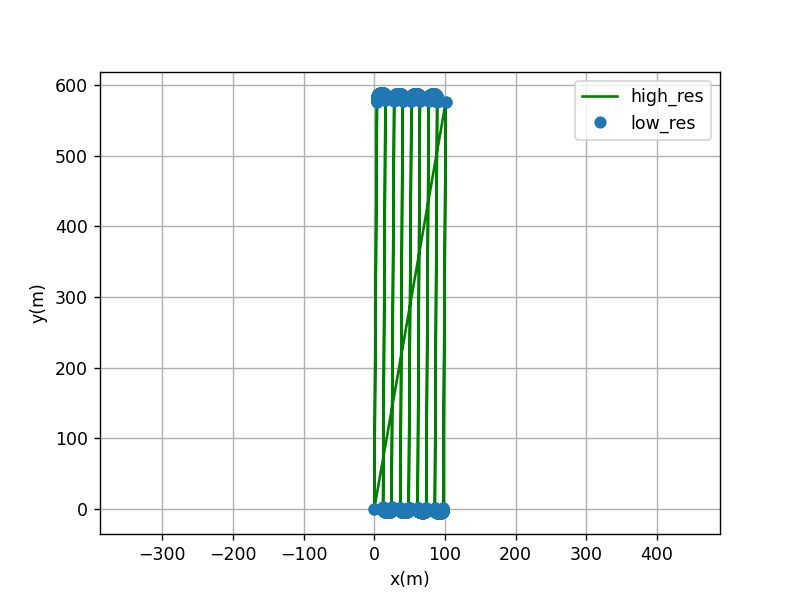

In [52]:
plt.figure()
plt.grid()
plt.axis("equal")
plothighresandlowres()